## Preprocessing

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [21]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [22]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_value_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 300  ##HELP
application_types_to_replace = application_type_value_counts[application_type_value_counts < cutoff].index##HELP

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_type_value_counts = application_df['CLASSIFICATION'].value_counts()
print(application_type_value_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_values = application_df['CLASSIFICATION'].value_counts()
classification_kept = classification_count_values[classification_count_values > 1].index.tolist()##HELP
classification_count_values.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_count_values[classification_count_values<= 1000].index.tolist()##HELP

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
application_encoded_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE'], drop_first=True)
application_encoded_df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8
0,Independent,C1000,ProductDev,Association,1,0,N,5000,1,1,0,0,0,0,0,0,0
1,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0,0,1,0,0,0,0,0
2,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0,0,0,1,0,0,0
3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0,0,1,0,0,0,0,0
4,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0,0,1,0,0,0,0,0


In [28]:
#Convert categorical data to numeric with pd.get_dummies
numeric_application_df = pd.get_dummies(application_df,dtype=float)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Split our preprocessed data into our features and target arrays
X = numeric_application_df.drop('IS_SUCCESSFUL', axis=1).values
y = numeric_application_df['IS_SUCCESSFUL'].values  

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [30]:
print(X_train)

[[1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 [1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 [1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 ...
 [1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 [1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 [1.e+00 5.e+03 0.e+00 ... 0.e+00 1.e+00 0.e+00]]


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler() 

# Fit the StandardScaler
X_scaler = scaler.fit(X_train) 

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

#Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,231 (59.50 KB)

 Trainable params: 15,231 (59.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.7068 - loss: 0.5869
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7348 - loss: 0.5511
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.7367 - loss: 0.5486
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7288 - loss: 0.5513
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7354 - loss: 0.5440
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.7309 - loss: 0.5497
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7336 - loss: 0.5457
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7335 - loss: 0.5451
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7299 - loss: 0.5443
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7322 - loss: 0.5449
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.7314 - loss: 0.5463
Epoch 12/100
804/80

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 417us/step - accuracy: 0.7285 - loss: 0.5755
Loss: 0.5754720568656921, Accuracy: 0.7285131216049194


In [36]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")

<Axes: >

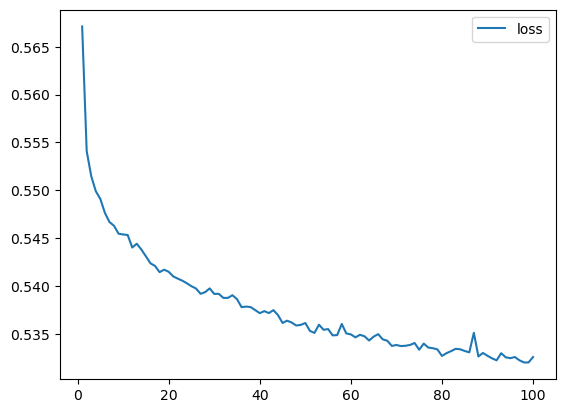

In [41]:
# Create a DataFrame containing training history
alphabet_soup_optimization2_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
alphabet_soup_optimization2_df.index += 1

# Plot the loss
alphabet_soup_optimization2_df.plot(y="loss")

<Axes: >

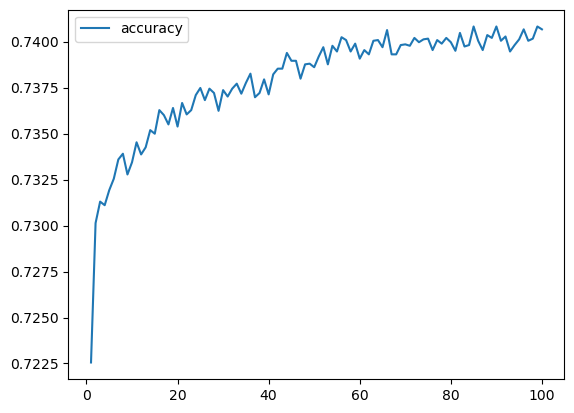

In [42]:
# Plot the accuracy
alphabet_soup_optimization2_df.plot(y="accuracy")